In [381]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

#from salishsea_tools import viz_tools

In [382]:
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

In [415]:
data = xr.open_dataset('PBDE_particles_for_0112021_run_Buriedin14days.zarr')
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
print (nobs, ntraj)
data.z

/ocean/sallen/miniconda3/envs/py311_parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/ocean/sallen/miniconda3/envs/py311_parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


57 2976


<xarray.DataArray 'z' (trajectory: 2976, obs: 57)> Size: 1MB
[169632 values with dtype=float64]
Coordinates:
  * obs         (obs) int32 228B 0 1 2 3 4 5 6 7 8 ... 49 50 51 52 53 54 55 56
  * trajectory  (trajectory) int64 24kB 15552 15553 15554 ... 18525 18526 18527
Attributes:
    long_name:      
    positive:       down
    standard_name:  depth
    units:          m

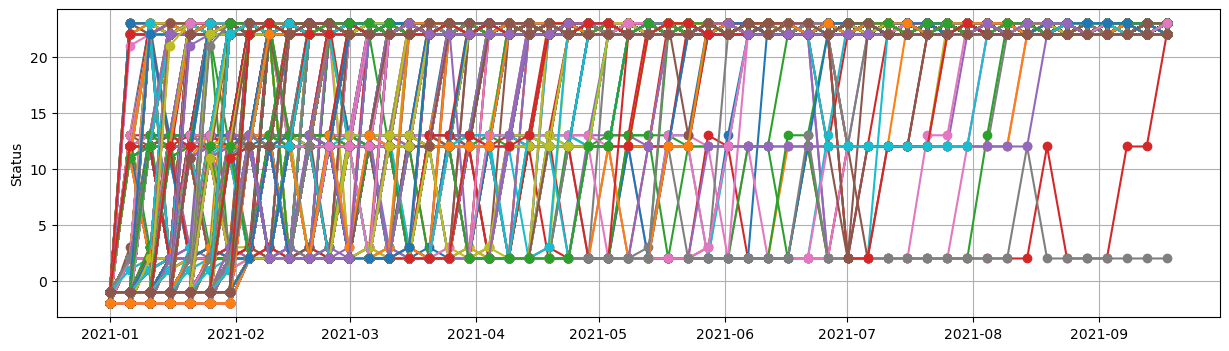

In [384]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = (data.status[ii, :tend])
    x = data.time[ii, :tend]
    ax.plot(x, y, 'o-')
ax.set_ylabel('Status')
ax.grid();

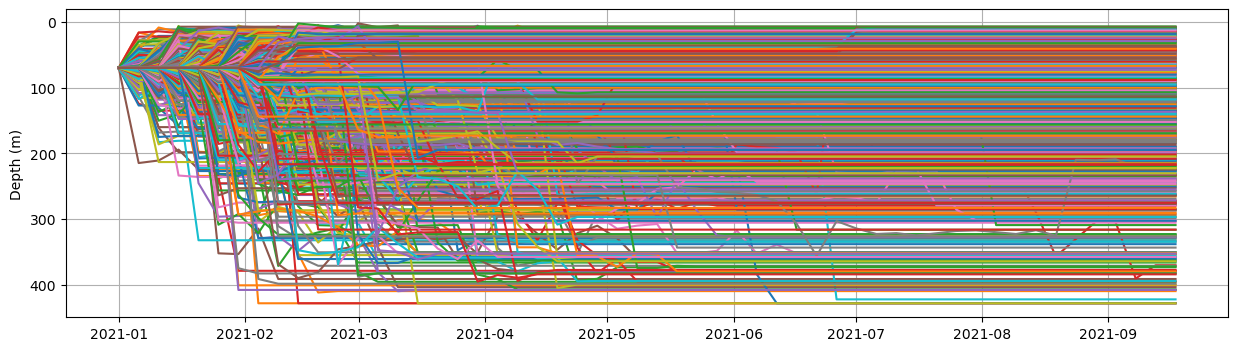

In [385]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.z[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '-')
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.grid();

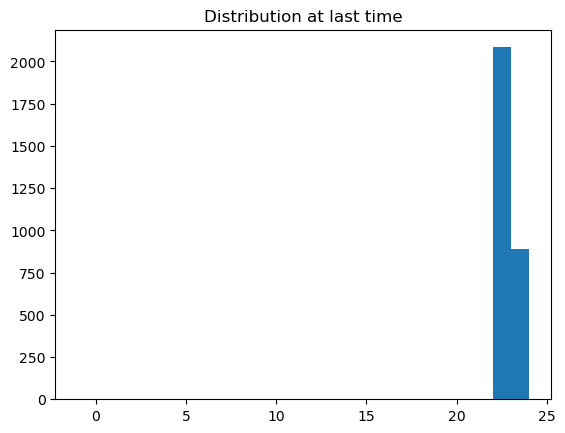

In [386]:
plt.hist(data.status[:, -1], bins=(range(-1, 25, 1)))
plt.title('Distribution at last time');

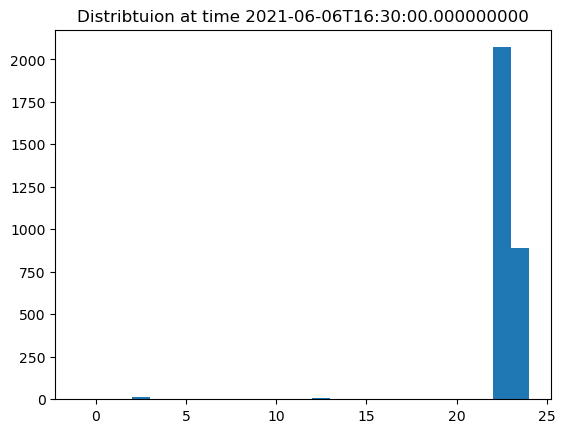

In [387]:
plt.hist(data.status[:, 32], bins=(range(-1, 25, 1)))
plt.title(f'Distribution at time {data.time[0, 32].values}');

2975
Buried Status  nan
Sediment Status  0.063997113997114
Watercolumn Status  0.0


/tmp/ipykernel_1957351/1828987376.py:20: RuntimeWarning: invalid value encountered in divide
  print('Buried Status ',((np.count_nonzero(data.status == 23, axis=0)/
/tmp/ipykernel_1957351/1828987376.py:21: RuntimeWarning: Mean of empty slice.
  np.count_nonzero(data.status == 22, axis=0))[67:]).mean())
/ocean/sallen/miniconda3/envs/py311_parcels/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_1957351/1828987376.py:25: RuntimeWarning: invalid value encountered in divide
  axs[2].plot(data.time[0, :], np.count_nonzero(data.status == 13, axis=0)
/tmp/ipykernel_1957351/1828987376.py:27: RuntimeWarning: invalid value encountered in divide
  axs[2].plot(data.time[0, :], np.count_nonzero(data.status == 23, axis=0)
/tmp/ipykernel_1957351/1828987376.py:31: RuntimeWarning: invalid value encountered in divide
  axs[2].plot(data.time[0, :], np.count_nonzero(data.status == 3, axis

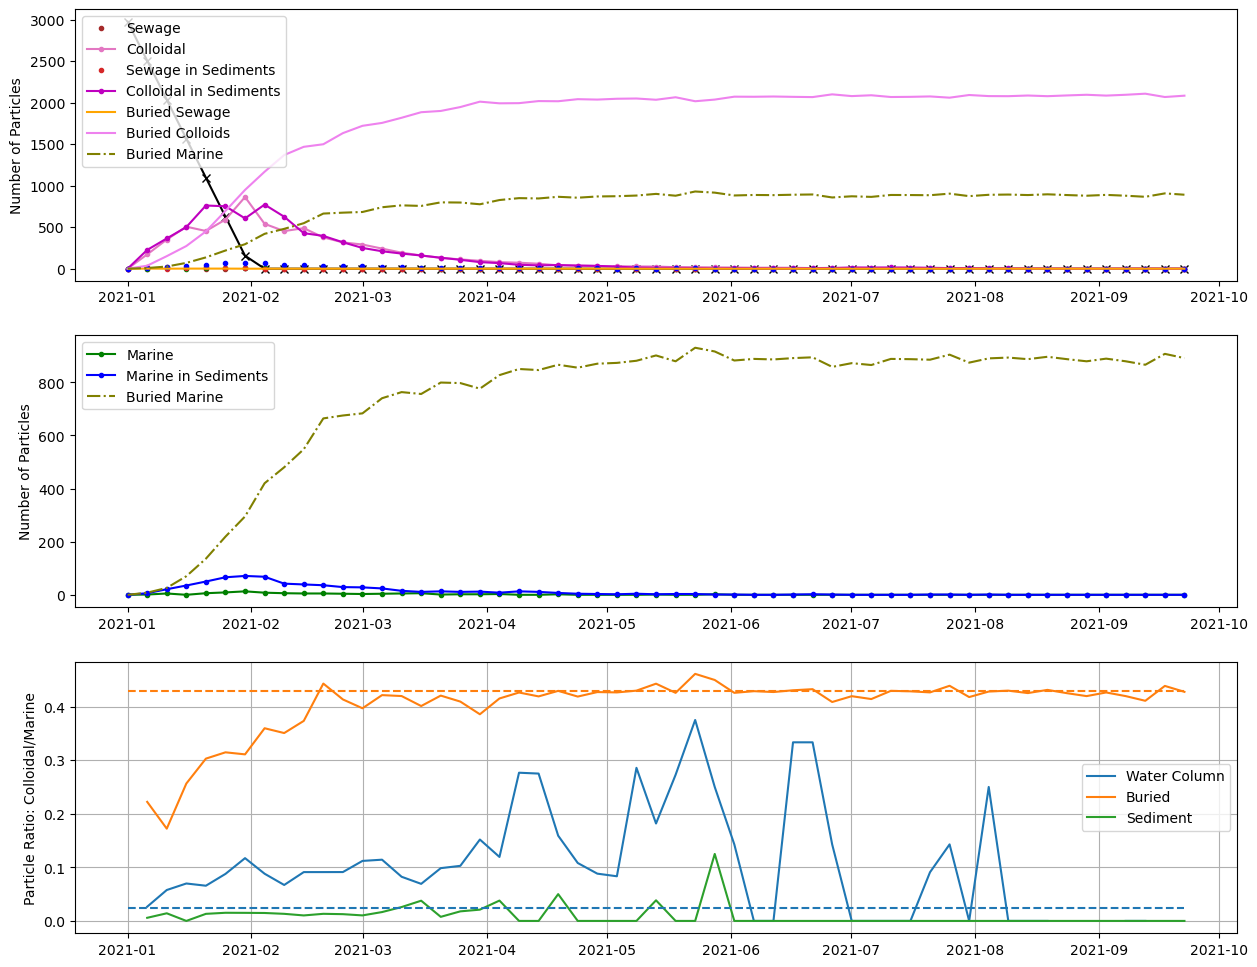

In [410]:
fig, axs = plt.subplots(3, 1, figsize=(15, 12))
axs[0].plot(data.time[0, :], np.count_nonzero(data.status < 0, axis=0), 'x-', c='k')

axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 1, axis=0), '.', c='brown', label='Sewage')
axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 2, axis=0), '.-', c='tab:pink', label='Colloidal')
axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 3, axis=0), 'g.')

axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 11, axis=0), '.', 
            c='tab:red', label='Sewage in Sediments')
axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 12, axis=0), 'm.-', label='Colloidal in Sediments')
axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 13, axis=0), 'b.');

axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 21, axis=0), '-', 
            c='orange', label='Buried Sewage');
axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 22, axis=0), '-', 
            c='violet', label='Buried Colloids');
axs[0].plot(data.time[0, :], np.count_nonzero(data.status == 23, axis=0), '-.', 
            c='olive', label='Buried Marine')
print ((np.count_nonzero(data.status > 20, axis=0)).max())
print('Buried Status ',((np.count_nonzero(data.status == 23, axis=0)/
                         np.count_nonzero(data.status == 22, axis=0))[67:]).mean())

axs[0].legend()

axs[2].plot(data.time[0, :], np.count_nonzero(data.status == 13, axis=0)
            /np.count_nonzero(data.status == 12, axis=0), label='Water Column')
axs[2].plot(data.time[0, :], np.count_nonzero(data.status == 23, axis=0)
            /np.count_nonzero(data.status == 22, axis=0), label='Buried')
axs[2].plot(data.time[0, :], 30/70. * np.ones_like(data.status[0, :]), '--', c='tab:orange')

axs[2].plot(data.time[0, :], np.count_nonzero(data.status == 3, axis=0)
            /np.count_nonzero(data.status == 2, axis=0), label='Sediment')
axs[2].plot(data.time[0, :], 0.038/1.6 * np.ones_like(data.status[0, :]), '--', c='tab:blue')
print('Sediment Status ', (np.nanmean((np.count_nonzero(data.status == 13, axis=0)
                            /np.count_nonzero(data.status == 12, axis=0))[35:])))
print('Watercolumn Status ', (np.nanmean((np.count_nonzero(data.status == 3, axis=0)
                            /np.count_nonzero(data.status == 2, axis=0))[35:])))
axs[2].grid();

axs[1].plot(data.time[0, :], np.count_nonzero(data.status == 3, axis=0), '-g.', label='Marine')
axs[1].plot(data.time[0, :], np.count_nonzero(data.status == 13, axis=0), '-b.', label='Marine in Sediments')
axs[1].plot(data.time[0, :], np.count_nonzero(data.status == 23, axis=0), '-.', 
            c='olive', label='Buried Marine')
axs[1].legend();

axs[0].set_ylabel('Number of Particles')
axs[1].set_ylabel('Number of Particles')
axs[2].set_ylabel('Particle Ratio: Colloidal/Marine')
axs[2].legend();


0


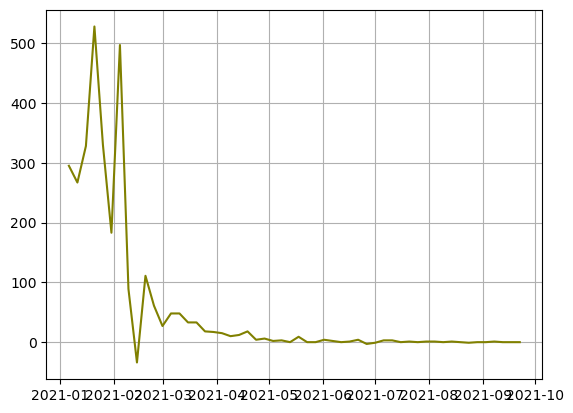

In [389]:
delta = np.count_nonzero(data.status[:, 1:] >= 10, axis=0) - np.count_nonzero(data.status[:, :-1] >= 10, axis=0)
#plt.plot(data.time[0, :], np.count_nonzero(data.status == 23, axis=0), '-', c='olive', label='Buried Marine')
plt.plot(data.time[0, 1:], delta, '-', c='olive', label='Sediment and Buried')
print ((delta[67:][delta[67:] < 0]).sum())
plt.grid();

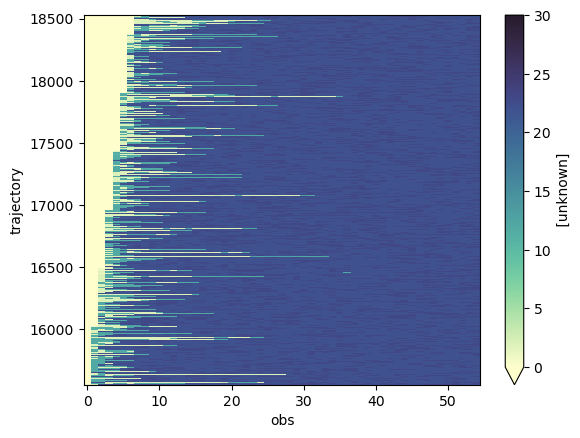

In [390]:
data.status.plot(cmap=cm_deep, vmin=0, vmax=30);

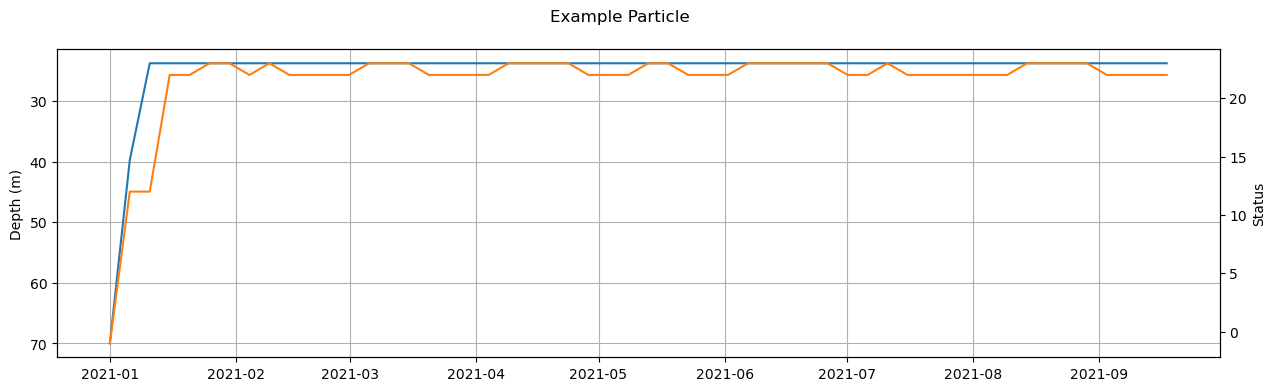

In [391]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
ii = 2
y = data.z[ii, :tend]
x = data.time[ii, :tend]
ax.plot(x, y, '-')
ax.invert_yaxis()
ax.grid();
ax2 = ax.twinx()
ax2.plot(x, data.status[ii, :tend], c='tab:orange');
ax.set_ylabel('Depth (m)')
ax2.set_ylabel('Status')
fig.suptitle('Example Particle');

fig, ax = plt.subplots(1, 1)
for ii in range(10):
    y = data.z[ii, :]
    x = data.time[ii, :]
    ax.plot(x, y, '-');
ax.set_ylim((86, 85))
ax.grid();
ax.plot(x, bottom_depth * np.ones_like(y), '--k');

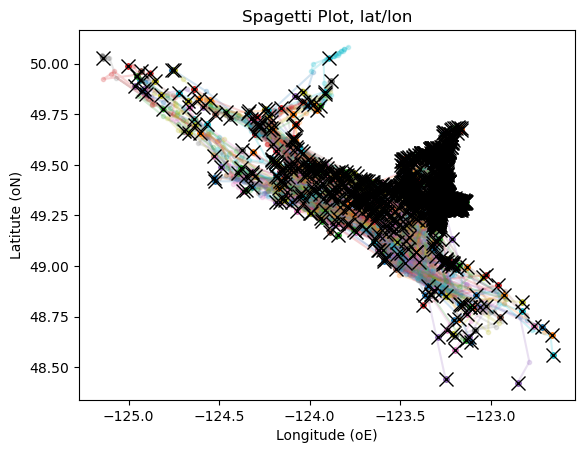

In [392]:
fig, ax = plt.subplots(1, 1)
for ii in range(ntraj):
    y = data.lat[ii, :]
    x = data.lon[ii, :]
    plt.plot(x, y, '.-', alpha=0.2);
    if data.status[ii, -1] > 20:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], 'xk', markersize=10, zorder=5);
    elif data.status[ii, -1] > 10:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], '+k', markersize=15, zorder=5);
    else:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], 'ok', zorder=5);
ax.set_title('Spagetti Plot, lat/lon');
ax.set_ylabel('Latitute (oN)')
ax.set_xlabel('Longitude (oE)');

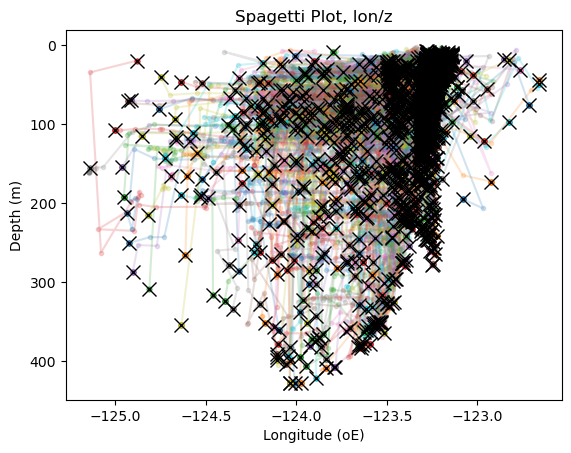

In [393]:
fig, ax = plt.subplots(1, 1)
for ii in range(ntraj):
    y = data.z[ii, :]
    x = data.lon[ii, :]
    plt.plot(x, y, '.-', alpha=0.2);
    if data.status[ii, -1] > 20:
        ax.plot(data.lon[ii, -1], data.z[ii, -1], 'xk', markersize=10, zorder=5);
    elif data.status[ii, -1] > 10:
        ax.plot(data.lon[ii, -1], data.z[ii, -1], '+k', markersize=15, zorder=5);
    else:
        ax.plot(data.lon[ii, -1], data.z[ii, -1], 'ok', zorder=5);
ax.invert_yaxis();
ax.set_title('Spagetti Plot, lon/z');
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Longitude (oE)');

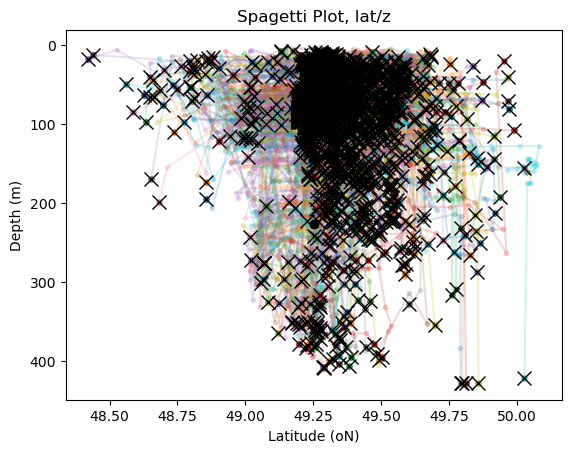

In [394]:
fig, ax = plt.subplots(1, 1)
for ii in range(ntraj):
    y = data.z[ii, :]
    x = data.lat[ii, :]
    plt.plot(x, y, '.-', alpha=0.2);
    if data.status[ii, -1] > 20:
        ax.plot(data.lat[ii, -1], data.z[ii, -1], 'xk', markersize=10, zorder=5);
    elif data.status[ii, -1] > 10:
        ax.plot(data.lat[ii, -1], data.z[ii, -1], '+k', markersize=15, zorder=5);
    else:
        ax.plot(data.lat[ii, -1], data.z[ii, -1], 'ok', zorder=5);
ax.invert_yaxis();
ax.set_title('Spagetti Plot, lat/z');
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude (oN)');

In [395]:
#clat = [49.195045]
#clon = [-123.301956]
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
print (bathy.nav_lat[445, 302].values, bathy.nav_lon[445, 302].values)
print (bathy.nav_lat[445, 304].values, bathy.nav_lon[445, 304].values)
ioutfall, joutfall = 445, 304
print (bathy.Bathymetry[ioutfall, joutfall].values)
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
print (mesh.mbathy[0, ioutfall, joutfall].values)
print (mesh.gdepw_0[0, 26, ioutfall, joutfall].values)

49.1912727355957 -123.31233978271484
49.195045471191406 -123.30195617675781
85.375
26
85.375


In [396]:
bottom_depth = mesh.gdepw_0[0, 26, ioutfall, joutfall].values

/tmp/ipykernel_1957351/2521807159.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


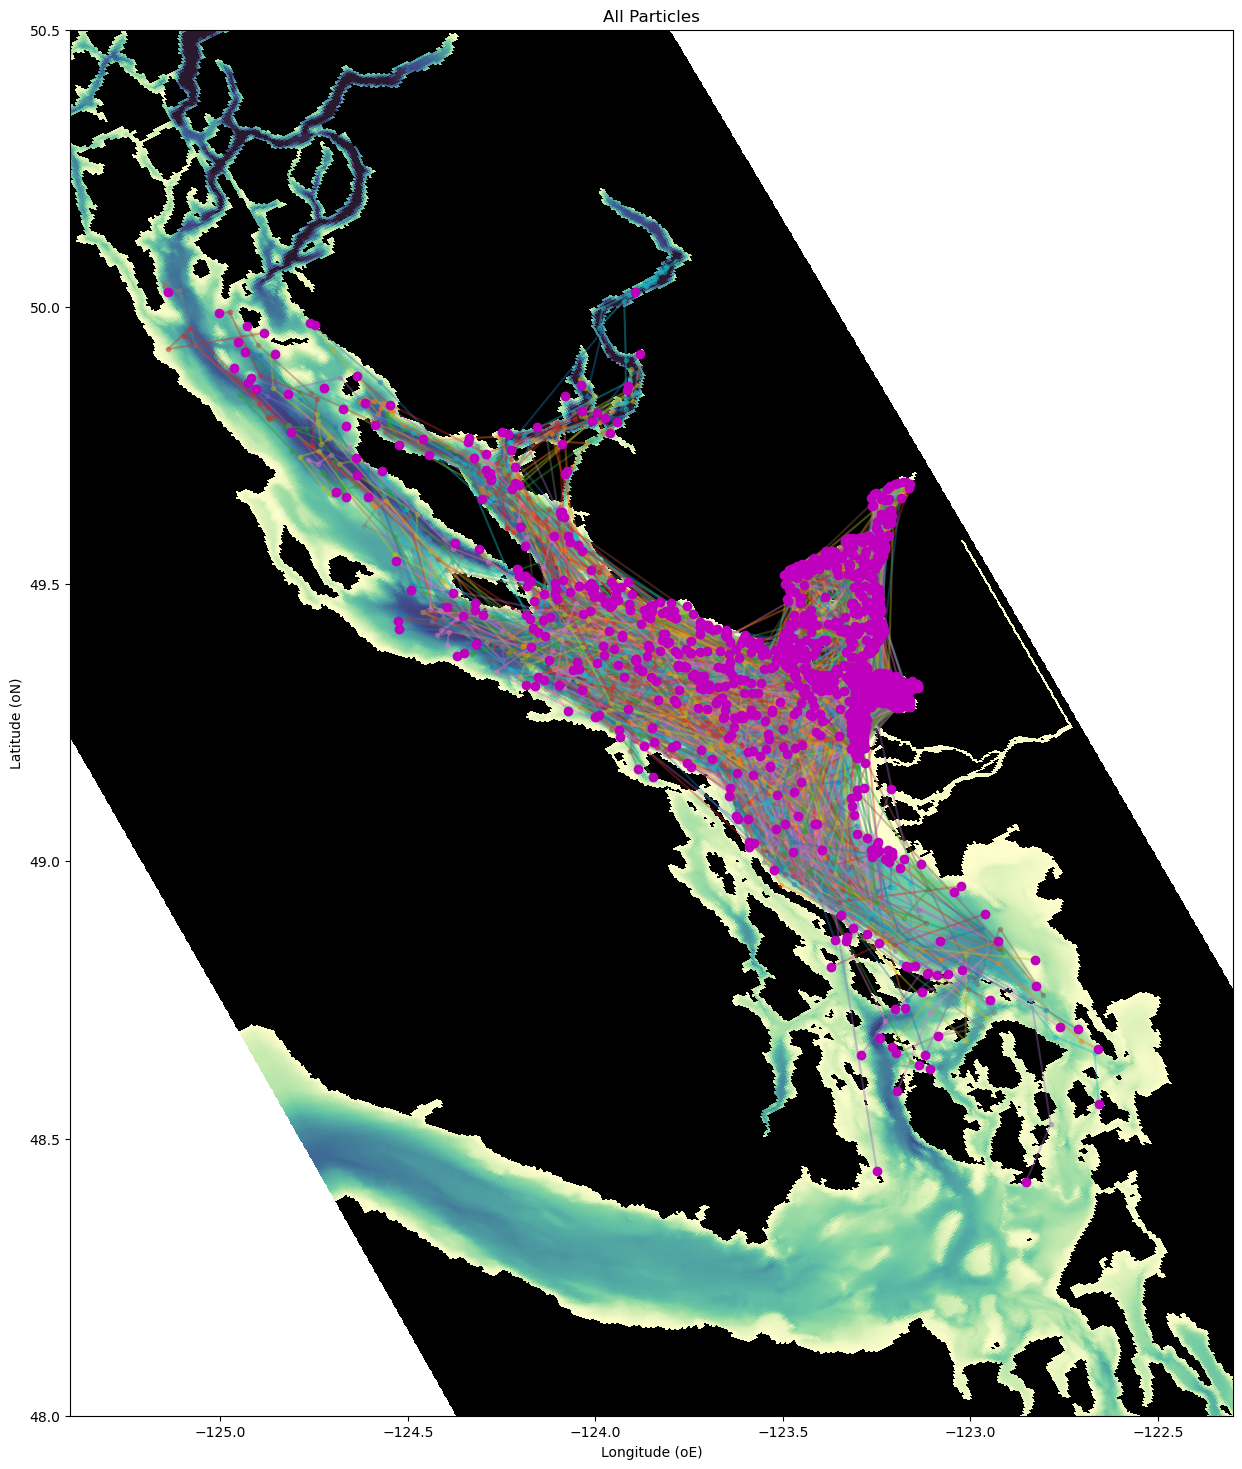

In [397]:
fig, ax = plt.subplots(1, 1, figsize=(15, 18))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
#viz_tools.set_aspect(ax, coords='map')
ax.set_xlim(-125.4, -122.3)
ax.set_ylim(48, 50.5);

for ii in range(ntraj):
    y = data.lat[ii]
    x = data.lon[ii]
    ax.plot(x, y, '.-', alpha=0.4);
    if data.status[ii, -1] > 20:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], 'om', zorder=5);
    elif data.status[ii, -1] > 10:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], '+m', zorder=5);
    else:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], 'xm', zorder=5);
ax.set_title('All Particles');
ax.set_ylabel('Latitude (oN)')
ax.set_xlabel('Longitude (oE)');

/tmp/ipykernel_1957351/4112133920.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


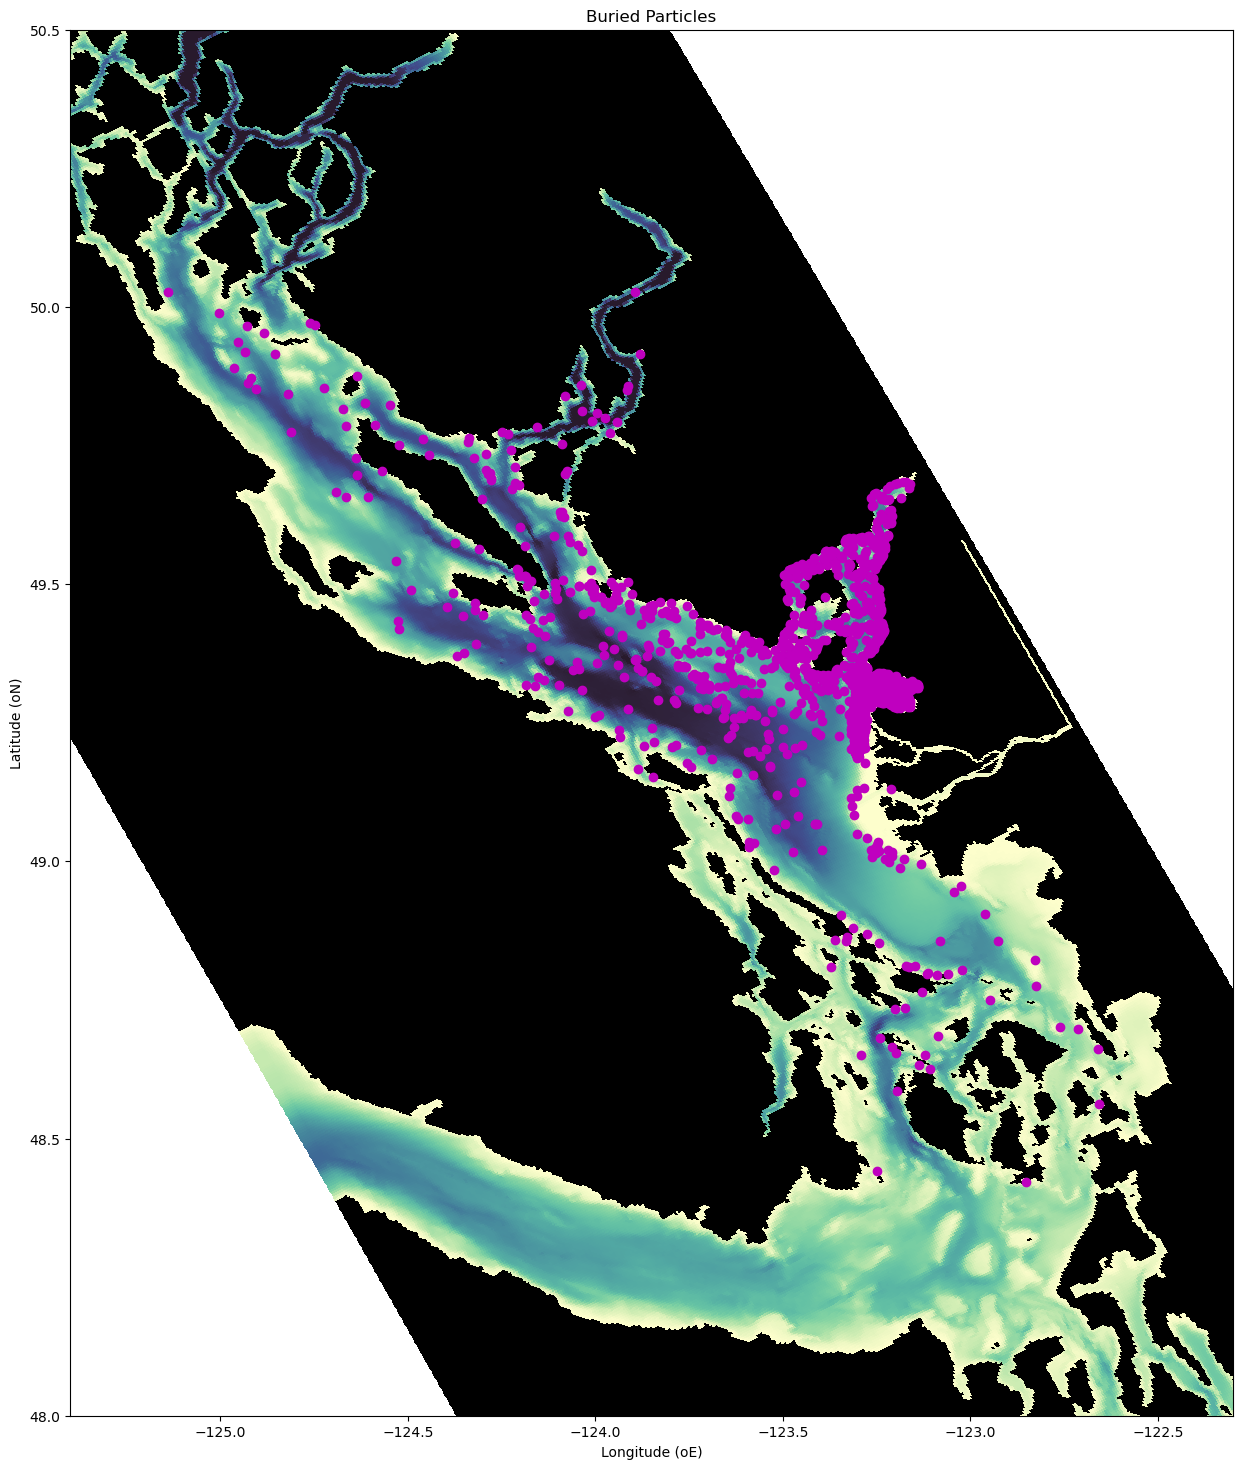

In [398]:
fig, ax = plt.subplots(1, 1, figsize=(15, 18))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
#viz_tools.set_aspect(ax, coords='map')
ax.set_xlim(-125.4, -122.3)
ax.set_ylim(48, 50.5);

for ii in range(ntraj):
    y = data.lat[ii]
    x = data.lon[ii]
    if data.status[ii, -1] > 20:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], 'om', zorder=5);
ax.set_title('Buried Particles');
ax.set_ylabel('Latitude (oN)')
ax.set_xlabel('Longitude (oE)');

/tmp/ipykernel_1957351/2892706941.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


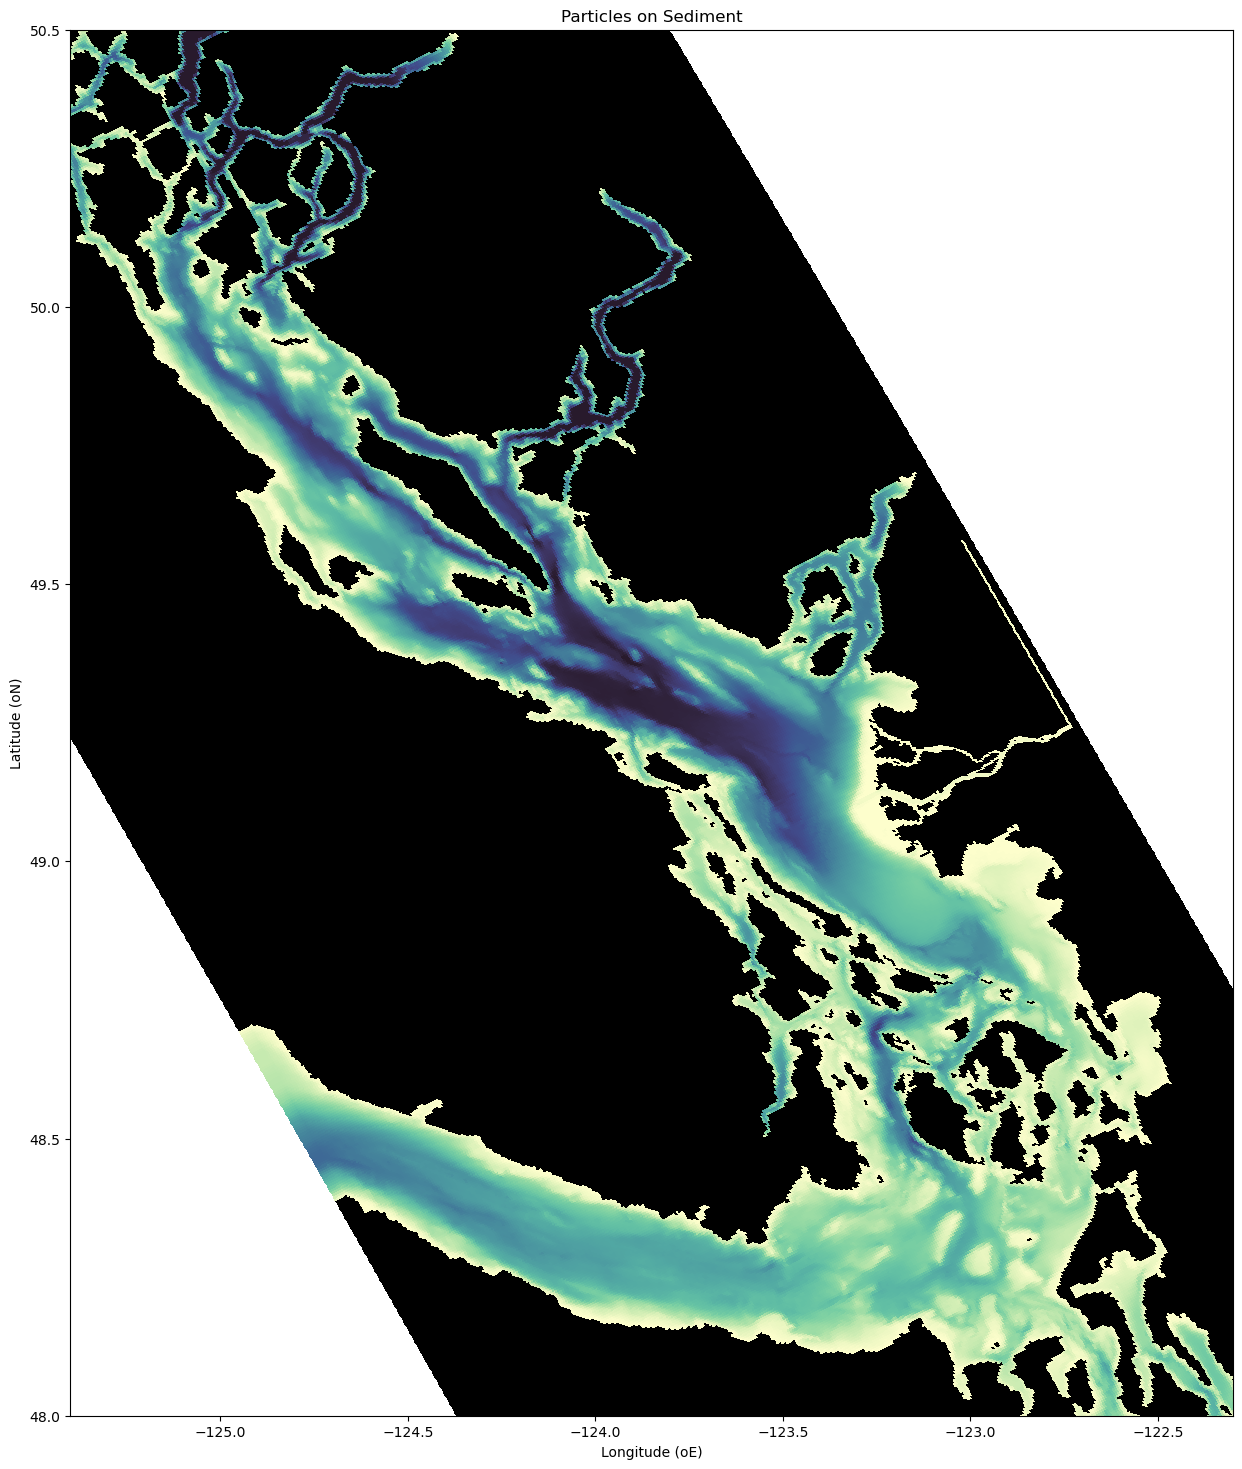

In [399]:
fig, ax = plt.subplots(1, 1, figsize=(15, 18))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
#viz_tools.set_aspect(ax, coords='map')
ax.set_xlim(-125.4, -122.3)
ax.set_ylim(48, 50.5);

for ii in range(ntraj):
    y = data.lat[ii]
    x = data.lon[ii]
    if data.status[ii, -1] > 20:
        pass
    elif data.status[ii, -1] > 10:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], '+m', zorder=5);
ax.set_title('Particles on Sediment');
ax.set_ylabel('Latitude (oN)')
ax.set_xlabel('Longitude (oE)');

/tmp/ipykernel_1957351/414692047.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


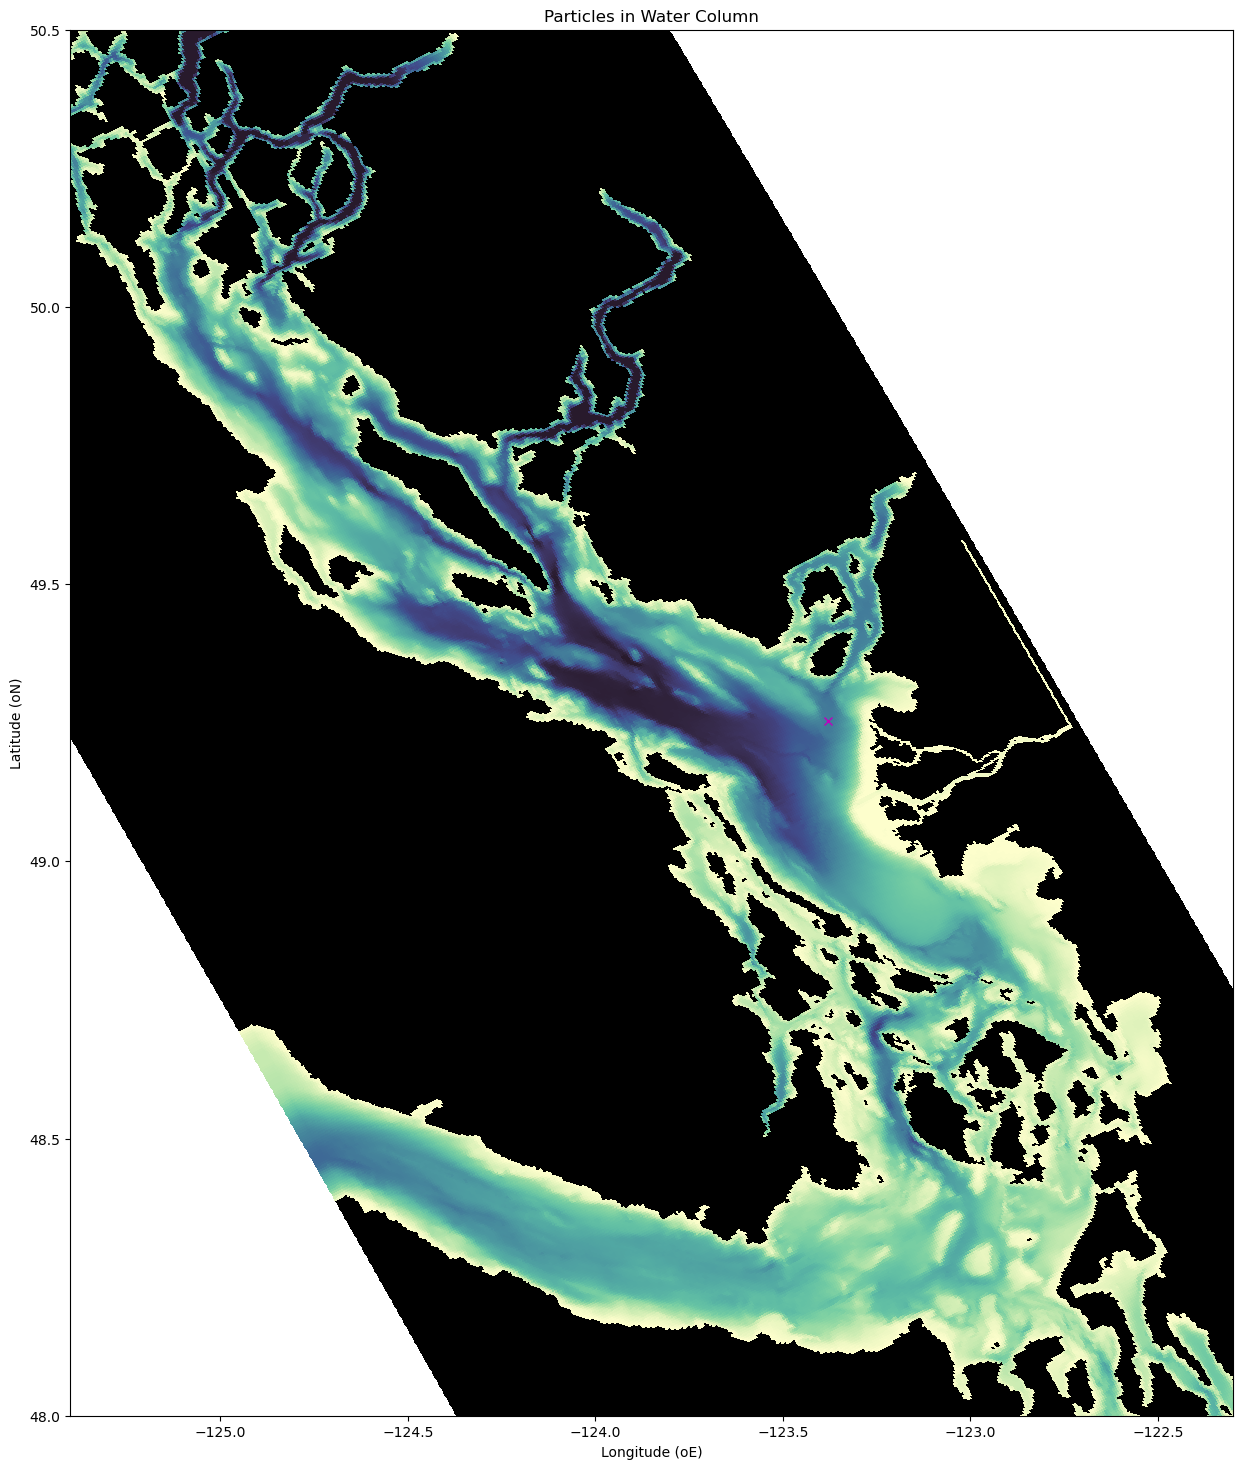

In [400]:
fig, ax = plt.subplots(1, 1, figsize=(15, 18))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
#viz_tools.set_aspect(ax, coords='map')
ax.set_xlim(-125.4, -122.3)
ax.set_ylim(48, 50.5);

for ii in range(ntraj):
    y = data.lat[ii]
    x = data.lon[ii]
    if data.status[ii, -1] > 20:
        pass
    elif data.status[ii, -1] > 10:
        pass
    else:
        ax.plot(data.lon[ii, -1], data.lat[ii, -1], 'xm', zorder=5);
ax.set_title('Particles in Water Column');
ax.set_ylabel('Latitude (oN)')
ax.set_xlabel('Longitude (oE)');

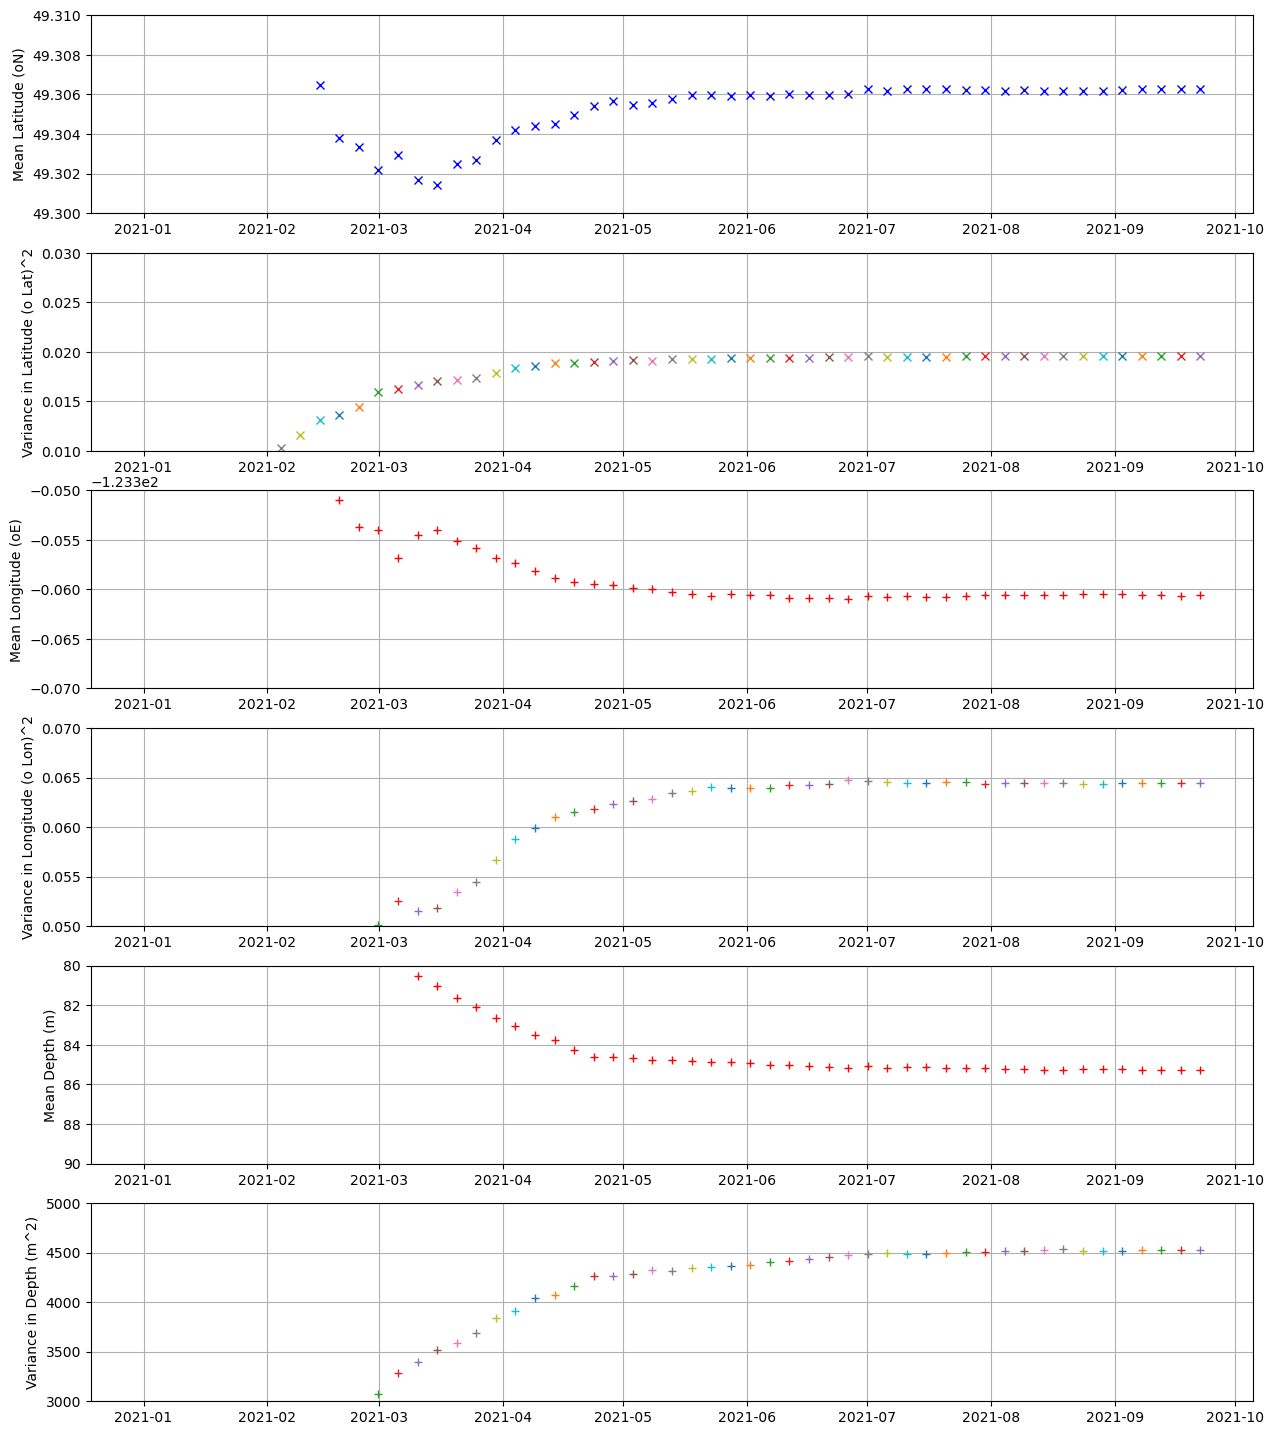

In [401]:
fig, axs = plt.subplots(6, 1, figsize=(15, 18))
for jj in range(nobs):
    y = data.lat[:, jj].mean()
    yvar = data.lat[:, jj].var()
    x = data.lon[:, jj].mean()
    xvar = data.lon[:, jj].var()
    z = data.z[:, jj].mean()
    zvar = data.z[:, jj].var()
    axs[0].plot(data.time[0, jj], y, 'bx')
    axs[0].set_ylim(49.3, 49.31)
    axs[0].set_ylabel('Mean Latitude (oN)')
    axs[1].plot(data.time[0, jj], yvar, 'x')
    axs[1].set_ylim(0.01, 0.03)
    axs[1].set_ylabel('Variance in Latitude (o Lat)^2')
    axs[2].plot(data.time[0, jj], x, 'r+')
    axs[2].set_ylim(-123.37, -123.35)
    axs[2].set_ylabel('Mean Longitude (oE)')
    axs[3].plot(data.time[0, jj], xvar, '+')
    axs[3].set_ylim(0.05, 0.07)
    axs[3].set_ylabel('Variance in Longitude (o Lon)^2')   
    axs[4].plot(data.time[0, jj], z, 'r+')
    axs[4].set_ylim(80, 90)
    axs[4].invert_yaxis()
    axs[4].set_ylabel('Mean Depth (m)')
    axs[5].plot(data.time[0, jj], zvar, '+')
    axs[5].set_ylim(3000, 5000)
    axs[5].set_ylabel('Variance in Depth (m^2)')
for ax in axs:
    ax.grid()

In [411]:
go_back = 44-26
number_in_watercolumn = np.zeros((go_back))
for it in range(-go_back, 0, 1):
    number_in_watercolumn[it] = data.status[:, it][data.status[:, it] < 10].values.shape[0]
print (number_in_watercolumn.mean())

3.111111111111111


In [416]:
go_back = data.status.shape[1]
number_in_watercolumn = np.zeros((go_back))
for it in range(0, go_back):
    positive = data.status[:, it][data.status[:, it] > 0]
    number_in_watercolumn[it] = positive.values[positive.values < 10].shape[0]
print (number_in_watercolumn.mean())

123.87719298245614


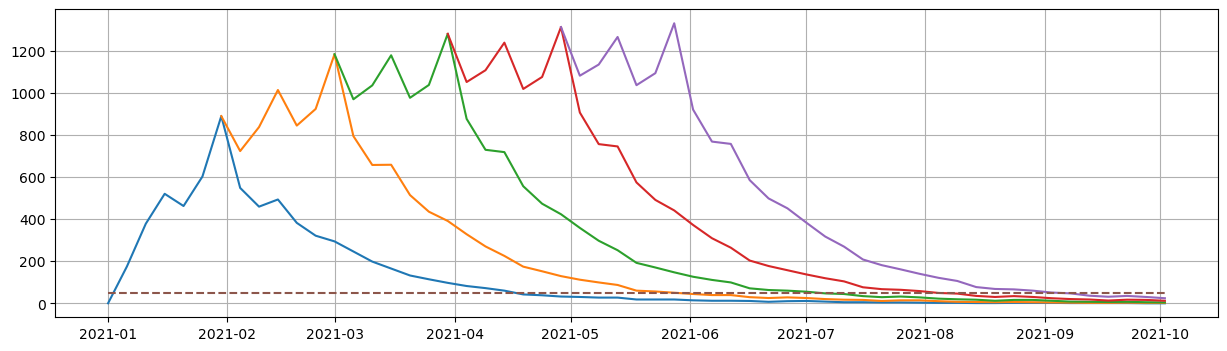

In [417]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(data.time[0], number_in_watercolumn)
ax.plot(data.time[0, 6:], number_in_watercolumn[0:-6] + number_in_watercolumn[6:])
ax.plot(data.time[0, 12:], number_in_watercolumn[0:-12] + number_in_watercolumn[6:-6]
       + number_in_watercolumn[12:]);
ax.plot(data.time[0, 18:], number_in_watercolumn[0:-18] + number_in_watercolumn[6:-12]
       + number_in_watercolumn[12:-6] + number_in_watercolumn[18:]);
ax.plot(data.time[0, 24:], number_in_watercolumn[0:-24] + number_in_watercolumn[6:-18]
       + number_in_watercolumn[12:-12] + number_in_watercolumn[18:-6]+ number_in_watercolumn[24:]);
ax.plot(data.time[0], 50*np.ones_like(number_in_watercolumn), '--')
ax.grid();

In [405]:
print(data.time[0].values)

['2021-01-01T00:30:00.000000000' '2021-01-05T22:00:00.000000000'
 '2021-01-10T19:30:00.000000000' '2021-01-15T17:00:00.000000000'
 '2021-01-20T14:30:00.000000000' '2021-01-25T12:00:00.000000000'
 '2021-01-30T09:30:00.000000000' '2021-02-04T07:00:00.000000000'
 '2021-02-09T04:30:00.000000000' '2021-02-14T02:00:00.000000000'
 '2021-02-18T23:30:00.000000000' '2021-02-23T21:00:00.000000000'
 '2021-02-28T18:30:00.000000000' '2021-03-05T16:00:00.000000000'
 '2021-03-10T13:30:00.000000000' '2021-03-15T11:00:00.000000000'
 '2021-03-20T08:30:00.000000000' '2021-03-25T06:00:00.000000000'
 '2021-03-30T03:30:00.000000000' '2021-04-04T01:00:00.000000000'
 '2021-04-08T22:30:00.000000000' '2021-04-13T20:00:00.000000000'
 '2021-04-18T17:30:00.000000000' '2021-04-23T15:00:00.000000000'
 '2021-04-28T12:30:00.000000000' '2021-05-03T10:00:00.000000000'
 '2021-05-08T07:30:00.000000000' '2021-05-13T05:00:00.000000000'
 '2021-05-18T02:30:00.000000000' '2021-05-23T00:00:00.000000000'
 '2021-05-27T21:30:00.000